In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
cor=df.corr()
cor

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [7]:
df=pd.get_dummies(df)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [10]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=12.5,min_samples=4)
db.fit(df)

DBSCAN(eps=12.5, min_samples=4)

In [13]:
db_cluster=df.copy()
db_cluster.loc[:,"cluster"]=db.labels_
db_cluster

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,-1
3,23,16,77,1,0,0
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,-1
196,45,126,28,1,0,-1
197,32,126,74,0,1,-1
198,32,137,18,0,1,-1


In [25]:
#Calculating the size of each cluster created

db_clust_size=db_cluster.groupby('cluster').size().to_frame()
db_clust_size

,0
cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


In [30]:
#Defining the outliers


outliers = db_cluster[db_cluster['cluster']==-1]
outliers

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
2,20,16,6,1,0,-1
6,35,18,6,1,0,-1
7,23,18,94,1,0,-1
10,67,19,14,0,1,-1
11,35,19,99,1,0,-1
14,37,20,13,0,1,-1
19,35,23,98,1,0,-1
40,65,38,35,1,0,-1
158,34,78,1,0,1,-1
187,28,101,68,0,1,-1


Text(0.5, 1.0, 'How annual income corresponds to the spending rate ')

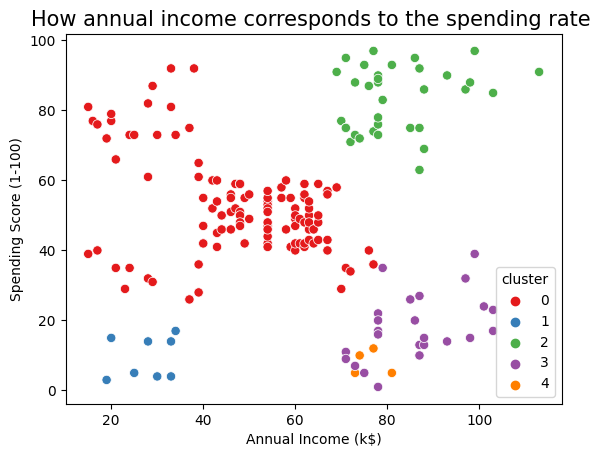

In [34]:
outliers = db_cluster[db_cluster['cluster']==-1]

ax=sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',
                data=db_cluster[db_cluster['cluster'] != -1],
                hue='cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('How annual income corresponds to the spending rate ', fontsize = 15)

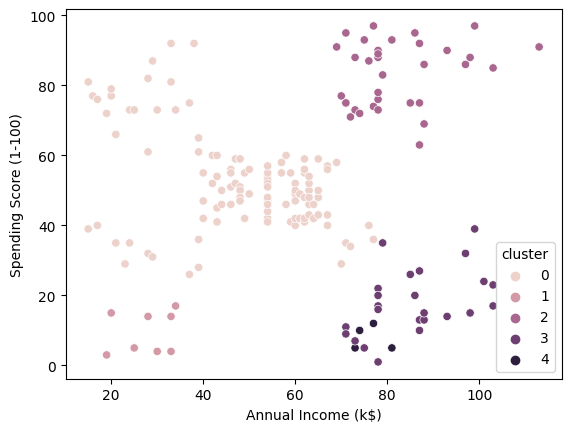

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                     data=db_cluster[db_cluster['cluster'] != -1],
                     hue='cluster')

plt.show()


In [39]:
X= df.to_numpy()
X

array([[ 19,  15,  39,   0,   1],
       [ 21,  15,  81,   0,   1],
       [ 20,  16,   6,   1,   0],
       [ 23,  16,  77,   1,   0],
       [ 31,  17,  40,   1,   0],
       [ 22,  17,  76,   1,   0],
       [ 35,  18,   6,   1,   0],
       [ 23,  18,  94,   1,   0],
       [ 64,  19,   3,   0,   1],
       [ 30,  19,  72,   1,   0],
       [ 67,  19,  14,   0,   1],
       [ 35,  19,  99,   1,   0],
       [ 58,  20,  15,   1,   0],
       [ 24,  20,  77,   1,   0],
       [ 37,  20,  13,   0,   1],
       [ 22,  20,  79,   0,   1],
       [ 35,  21,  35,   1,   0],
       [ 20,  21,  66,   0,   1],
       [ 52,  23,  29,   0,   1],
       [ 35,  23,  98,   1,   0],
       [ 35,  24,  35,   0,   1],
       [ 25,  24,  73,   0,   1],
       [ 46,  25,   5,   1,   0],
       [ 31,  25,  73,   0,   1],
       [ 54,  28,  14,   1,   0],
       [ 29,  28,  82,   0,   1],
       [ 45,  28,  32,   1,   0],
       [ 35,  28,  61,   0,   1],
       [ 40,  29,  31,   1,   0],
       [ 23,  

In [40]:
from fcmeans import FCM
fcm = FCM(n_clusters=2)
fcm.fit(X)

Text(0.5, 1.0, 'Analysing How Age of the Customers Corresponds to the Spending Rate')

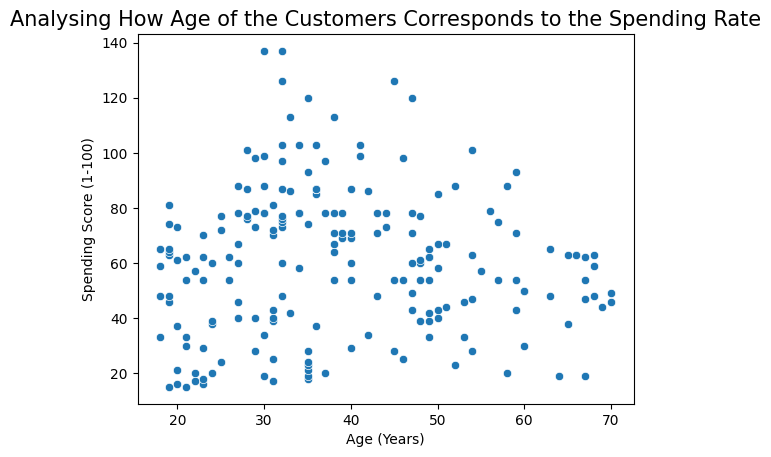

In [43]:
ax=sns.scatterplot(x=X[:,0],y=X[:,1])

ax.set_xlabel('Age (Years)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('Analysing How Age of the Customers Corresponds to the Spending Rate', fontsize = 15)

In [45]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)
fcm_labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [46]:
fcm_centers

array([[32.95923425, 70.3883065 , 68.08069889,  0.56259156,  0.43740844],
       [43.92206519, 54.10650677, 38.63954878,  0.57053528,  0.42946472]])

Text(0.5, 1.0, 'Predicting How Age of the Customers Corresponds to the Spending Rate')

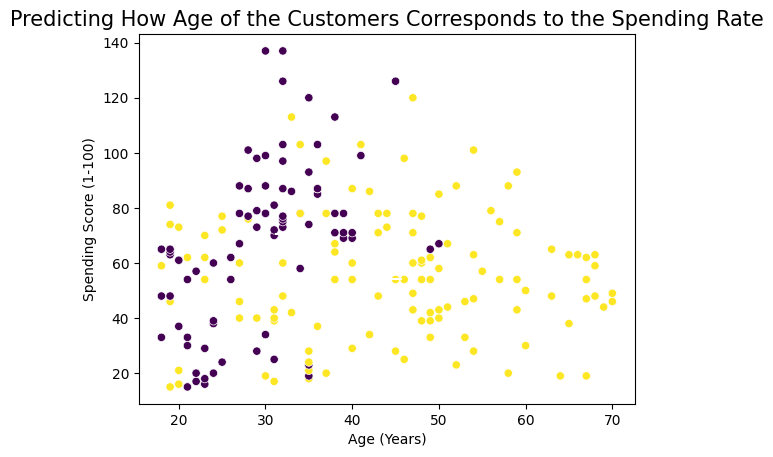

In [47]:
ax=sns.scatterplot(x=X[:,0],y=X[:,1], c=fcm_labels)
ax.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
ax.set_xlabel('Age (Years)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('Predicting How Age of the Customers Corresponds to the Spending Rate', fontsize = 15)